In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rain_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data강수량.csv", encoding="utf8")
humid_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data습도.csv", encoding="utf8")
temperature_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data평균기온.csv", encoding="utf8")
wind_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/data풍속.csv", encoding="utf8")

amount_produced = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_노지_시설_생산량_2001-2019.csv", encoding="utf8")
harvest_data1 = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_노지_재배면적_2002-2019.csv", encoding="utf8")
income_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_수입량_2002-2019.csv", encoding='utf8')
harvest_data2 = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/대파_시설_재배면적_2006-2019.csv", encoding="utf8")
oil_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/유가_2000-2019.csv", encoding='utf8')
minimum_wage_data = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(process)/최저임금_2000-2019.csv", encoding='utf8', thousands=",")

In [4]:
display(rain_data, humid_data, temperature_data, wind_data)

,지역별,년,월,평균월강수량,최다월강수량
0,서울특별시,2000,1,46.9,57.7
1,부산광역시,2000,1,19.3,36.5
2,대구광역시,2000,1,36.5,143.1
3,인천광역시,2000,1,46.9,57.7
4,광주광역시,2000,1,26.2,33.7
...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5
4076,전라남도,2019,12,34.2,41.5
4077,경상북도,2019,12,21.0,68.2
4078,경상남도,2019,12,37.1,50.3


,지역별,년,월,평균습도,최저습도
0,서울특별시,2000,1,67,20
1,부산광역시,2000,1,56,12
2,대구광역시,2000,1,60,11
3,인천광역시,2000,1,67,20
4,광주광역시,2000,1,63,12
...,...,...,...,...,...
4075,전라북도,2019,12,71,11
4076,전라남도,2019,12,67,6
4077,경상북도,2019,12,61,8
4078,경상남도,2019,12,61,9


,지역별,년,월,평균기온,최저기온,최고기온
0,서울특별시,2000,1,-2.3,-6.1,1.6
1,부산광역시,2000,1,1.7,-3.0,7.2
2,대구광역시,2000,1,0.3,-4.2,5.1
3,인천광역시,2000,1,-2.3,-6.1,1.6
4,광주광역시,2000,1,2.1,-1.6,5.9
...,...,...,...,...,...,...
4075,전라북도,2019,12,2.8,-1.7,8.0
4076,전라남도,2019,12,4.8,0.4,9.5
4077,경상북도,2019,12,2.4,-2.4,8.4
4078,경상남도,2019,12,4.3,-0.4,10.2


,지역별,년,월,평균풍속,최대풍속
0,서울특별시,2000,1,2.5,13.2
1,부산광역시,2000,1,1.7,13.0
2,대구광역시,2000,1,2.5,14.0
3,인천광역시,2000,1,2.5,13.2
4,광주광역시,2000,1,4.0,18.8
...,...,...,...,...,...
4075,전라북도,2019,12,1.4,10.8
4076,전라남도,2019,12,2.4,18.5
4077,경상북도,2019,12,1.9,16.4
4078,경상남도,2019,12,1.5,10.4


In [5]:
oil_data['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주',
       '세종특별자치시'], dtype=object)

In [6]:
oil_data = oil_data.replace("제주", "제주도")
oil_data['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주도', '세종특별자치시'], dtype=object)

In [7]:
amount_produced['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [8]:
display(amount_produced, harvest_data1, harvest_data2, income_data, oil_data, minimum_wage_data)

,Unnamed: 0,시도별,년,월,총생산량,노지_생산량,시설_생산량
0,0,서울특별시,2001,1,289.0,201.0,88.0
1,1,부산광역시,2001,1,995.0,908.0,87.0
2,2,대구광역시,2001,1,430.0,387.0,43.0
3,3,인천광역시,2001,1,361.0,323.0,38.0
4,4,광주광역시,2001,1,73.0,68.0,5.0
...,...,...,...,...,...,...,...
3871,12,전라북도,2019,12,915.0,682.0,233.0
3872,13,전라남도,2019,12,3741.0,3713.0,29.0
3873,14,경상북도,2019,12,795.0,658.0,137.0
3874,15,경상남도,2019,12,765.0,451.0,314.0


,Unnamed: 0,시도별,년,월,재배면적합계,논_재배면적,밭_재배면적
0,0,서울특별시,2002,1,158.0,2.0,156.0
1,1,부산광역시,2002,1,839.0,108.0,731.0
2,2,대구광역시,2002,1,318.0,11.0,307.0
3,3,인천광역시,2002,1,349.0,6.0,343.0
4,4,광주광역시,2002,1,22.0,0.0,22.0
...,...,...,...,...,...,...,...
3667,12,전라북도,2019,12,682.0,173.0,509.0
3668,13,전라남도,2019,12,3713.0,81.0,3632.0
3669,14,경상북도,2019,12,658.0,89.0,569.0
3670,15,경상남도,2019,12,451.0,275.0,176.0


,Unnamed: 0,시도별,년,월,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적
0,0,서울특별시,2006,1,20.0,0.0,20.0
1,1,부산광역시,2006,1,40.0,32.0,8.0
2,2,대구광역시,2006,1,32.0,7.0,25.0
3,3,인천광역시,2006,1,21.0,1.0,20.0
4,4,광주광역시,2006,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2851,12,전라북도,2019,12,233.0,35.0,198.0
2852,13,전라남도,2019,12,29.0,0.0,29.0
2853,14,경상북도,2019,12,137.0,1.0,136.0
2854,15,경상남도,2019,12,314.0,138.0,176.0


,Unnamed: 0,시도별,년,월,주산물수량,농가수취가격,총수입량
0,0,서울특별시,2002,1,3279,762,2498598
1,1,부산광역시,2002,1,3279,762,2498598
2,2,대구광역시,2002,1,3279,762,2498598
3,3,인천광역시,2002,1,3279,762,2498598
4,4,광주광역시,2002,1,3279,762,2498598
...,...,...,...,...,...,...,...
3667,3667,전라북도,2019,12,3312,855,2831760
3668,3668,전라남도,2019,12,3312,855,2831760
3669,3669,경상북도,2019,12,3312,855,2831760
3670,3670,경상남도,2019,12,3312,855,2831760


,Unnamed: 0,시도별,년,월,유가
0,0,서울특별시,2000,1,1228.97
1,1,부산광역시,2000,1,1212.20
2,2,대구광역시,2000,1,1201.29
3,3,인천광역시,2000,1,1225.15
4,4,광주광역시,2000,1,1216.67
...,...,...,...,...,...
4075,4075,전라남도,2019,12,1535.63
4076,4076,경상북도,2019,12,1531.29
4077,4077,경상남도,2019,12,1527.44
4078,4078,제주도,2019,12,1610.68


,Unnamed: 0,시도별,년,월,최저임금
0,0,서울특별시,2000,1,1600
1,1,부산광역시,2000,1,1600
2,2,대구광역시,2000,1,1600
3,3,인천광역시,2000,1,1600
4,4,광주광역시,2000,1,1600
...,...,...,...,...,...
4075,4075,전라북도,2019,12,8350
4076,4076,전라남도,2019,12,8350
4077,4077,경상북도,2019,12,8350
4078,4078,경상남도,2019,12,8350


In [9]:
amount_produced = amount_produced.iloc[1020:,1:]
harvest_data1 = harvest_data1.iloc[816:,1:]
income_data = income_data.iloc[816:,1:]
oil_data = oil_data.iloc[1224:,1:]
minimum_wage_data = minimum_wage_data.iloc[1224:,1:]
harvest_data2 = harvest_data2.iloc[:,1:]

In [10]:
all_data = pd.merge(left = rain_data, right=humid_data, how="outer", on=["지역별", '년', '월'])
all_data = pd.merge(left = all_data, right=temperature_data, how="outer", on=["지역별", '년', '월'])
all_data = pd.merge(left = all_data, right=wind_data, how="outer", on=["지역별", '년', '월'])
all_data

,지역별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,최대풍속
0,서울특별시,2000,1,46.9,57.7,67,20,-2.3,-6.1,1.6,2.5,13.2
1,부산광역시,2000,1,19.3,36.5,56,12,1.7,-3.0,7.2,1.7,13.0
2,대구광역시,2000,1,36.5,143.1,60,11,0.3,-4.2,5.1,2.5,14.0
3,인천광역시,2000,1,46.9,57.7,67,20,-2.3,-6.1,1.6,2.5,13.2
4,광주광역시,2000,1,26.2,33.7,63,12,2.1,-1.6,5.9,4.0,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,1.4,10.8
4076,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,2.4,18.5
4077,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,1.9,16.4
4078,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,1.5,10.4


In [11]:
all_data2 = pd.merge(left = amount_produced, right=harvest_data1, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=harvest_data2, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=income_data, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=oil_data, how="outer", on=["시도별", '년', '월'])
all_data2 = pd.merge(left = all_data2, right=minimum_wage_data, how="outer", on=["시도별", '년', '월'])
all_data2

,시도별,년,월,총생산량,노지_생산량,시설_생산량,재배면적합계,논_재배면적,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금
0,서울특별시,2006,1,185.0,165.0,20.0,165.0,2.0,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100
1,부산광역시,2006,1,976.0,936.0,40.0,936.0,362.0,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100
2,대구광역시,2006,1,164.0,132.0,32.0,132.0,7.0,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100
3,인천광역시,2006,1,268.0,247.0,21.0,247.0,35.0,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100
4,광주광역시,2006,1,7.0,7.0,0.0,7.0,2.0,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,915.0,682.0,233.0,682.0,173.0,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350
2852,전라남도,2019,12,3741.0,3713.0,29.0,3713.0,81.0,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350
2853,경상북도,2019,12,795.0,658.0,137.0,658.0,89.0,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350
2854,경상남도,2019,12,765.0,451.0,314.0,451.0,275.0,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350


In [12]:
all_data = all_data.iloc[1224:,:]

In [13]:
all_data = all_data.rename(columns={"지역별":"시도별"})
all_data 

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,최대풍속
1224,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,1.8,14.8
1225,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,1.6,10.2
1226,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,2.3,12.3
1227,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,1.8,14.8
1228,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,3.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4075,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,1.4,10.8
4076,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,2.4,18.5
4077,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,1.9,16.4
4078,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,1.5,10.4


In [14]:
all_data3 = pd.merge(left=all_data, right=all_data2, how="outer", on=["시도별", "년", "월"])
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,논_재배면적,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,2.0,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,362.0,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,7.0,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,35.0,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,2.0,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,173.0,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,81.0,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,89.0,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,275.0,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350


In [15]:
all_data3["거리"] = 0
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,0
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,0
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,0
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,0
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,0
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,0
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,0


In [16]:
all_data3['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [17]:
all_data3['거리'] = all_data3['거리'].astype(float)

In [18]:
for i, row in all_data3.iterrows():
  if all_data3.iloc[i,0] == '부산광역시':
    all_data3.at[i, "거리"] = 395.6
  elif all_data3.iloc[i,0] == '대구광역시':
    all_data3.at[i, "거리"] = 287.6
  elif all_data3.iloc[i,0] == '인천광역시':
    all_data3.at[i, "거리"] = 34.6
  elif all_data3.iloc[i,0] == '광주광역시':
    all_data3.at[i, "거리"] = 297.0
  elif all_data3.iloc[i,0] == '대전광역시':
    all_data3.at[i, "거리"] = 161.7
  elif all_data3.iloc[i,0] == '울산광역시':
    all_data3.at[i, "거리"] = 373.2
  elif all_data3.iloc[i,0] == '경기도':
    all_data3.at[i, "거리"] = 40.2
  elif all_data3.iloc[i,0] == '강원도':
    all_data3.at[i, "거리"] = 102.6
  elif all_data3.iloc[i,0] == '세종특별자치시':
    all_data3.at[i, "거리"] = 143.1
  elif all_data3.iloc[i,0] == '충청북도':
    all_data3.at[i, "거리"] = 140.9
  elif all_data3.iloc[i,0] == '충청남도':
    all_data3.at[i, "거리"] = 131.4
  elif all_data3.iloc[i,0] == '전라북도':
    all_data3.at[i, "거리"] = 216.5
  elif all_data3.iloc[i,0] == '전라남도':
    all_data3.at[i, "거리"] = 347.7
  elif all_data3.iloc[i,0] == '경상북도':
    all_data3.at[i, "거리"] = 226.0
  elif all_data3.iloc[i,0] == '경상남도':
    all_data3.at[i, "거리"] = 369.8
  elif all_data3.iloc[i,0] == '제주도':
    all_data3.at[i, "거리"] = 546.7
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,밭_재배면적,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,163.0,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,0.0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,574.0,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,395.6
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,125.0,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,287.6
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,212.0,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,34.6
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,5.0,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,509.0,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,216.5
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,3632.0,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,347.7
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,569.0,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,226.0
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,176.0,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,369.8


In [19]:
#seoul busan daejeon daegu

In [20]:
price_high = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(raw data)/가격/대파가격_상_서울.csv", thousands = ',',encoding='cp949')
price_low = pd.read_csv("/content/drive/Shareddrives/2022-1-인공지능/1. 데이터(raw data)/가격/대파가격_중_서울.csv", thousands = ',', encoding='cp949')
display(price_high, price_low)

,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균
0,2000,1202,1230,1196,1052,996,1254,1335,1517,1817,1379,1242,1066,1273
1,2001,1113,952,931,820,1055,1380,1284,1631,1486,1277,969,984,1161
2,2002,1044,1026,912,946,1221,1120,1099,1425,1981,1472,1316,1482,1253
3,2003,1996,2509,2536,2160,1930,1613,1496,1637,2349,2826,2618,2241,2157
4,2004,1950,2152,2493,2015,1468,1394,1474,2029,2307,1993,1757,1494,1878
5,2005,1345,1335,1324,1336,1434,1810,1984,2045,2299,2373,2245,2679,1866
6,2006,2953,3328,3382,3459,2813,2158,1866,2341,2221,1998,1781,1913,2522
7,2007,1647,1711,1592,1538,1500,1718,1922,1942,2552,3242,2976,3063,2113
8,2008,2734,2798,2925,2197,1949,1943,1571,1699,1693,1641,1522,1676,2022
9,2009,1902,1701,1562,1382,1594,2348,2402,2492,2450,2394,2344,2306,2080


,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연평균
0,2000,952,1030,998,902,798,1054,1123,1262,1513,1152,1044,866,1057
1,2001,1013,846,788,771,867,940,960,1252,1164,992,773,828,934
2,2002,800,767,700,772,988,900,880,1073,1565,1123,1004,1104,972
3,2003,1596,1952,1896,1720,1508,1313,1177,1165,1804,2146,1976,1662,1657
4,2004,1474,1675,1846,1483,963,888,1027,1330,1405,1171,927,835,1261
5,2005,790,700,741,814,795,1010,1145,1396,1691,1614,1530,2064,1205
6,2006,2268,2565,2386,2530,1845,1405,1285,1459,1423,1247,1210,1175,1737
7,2007,1000,1000,962,800,800,1070,1124,1064,1429,1945,1809,1874,1238
8,2008,1677,1800,1886,1062,1147,960,870,1055,1090,1027,1010,1155,1223
9,2009,1553,988,991,1045,1253,1768,1674,1767,1864,1857,1752,1567,1510


In [21]:
price_low = price_low.iloc[6:,1:-1]

In [22]:
price_low

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
6,2268,2565,2386,2530,1845,1405,1285,1459,1423,1247,1210,1175
7,1000,1000,962,800,800,1070,1124,1064,1429,1945,1809,1874
8,1677,1800,1886,1062,1147,960,870,1055,1090,1027,1010,1155
9,1553,988,991,1045,1253,1768,1674,1767,1864,1857,1752,1567
10,1620,2026,1959,2118,2311,2210,1850,1964,3321,3162,3073,2500
11,3271,2700,2307,1443,1009,990,1300,1564,1895,1540,1414,1248
12,1200,1598,1695,1605,1766,2265,2043,2170,2738,2426,2420,2516
13,2139,2105,2290,2425,2167,1668,1493,1738,1858,1514,1745,1650
14,1545,1555,1405,1300,1318,1308,1207,1416,1446,1299,1303,1705
15,1443,1603,1738,1733,2169,2523,2186,2204,2050,1894,1970,2363


In [23]:
all_data3['가격'] = 0
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,0.0,0
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,395.6,0
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,287.6,0
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,34.6,0
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,297.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,216.5,0
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,347.7,0
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,226.0,0
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,369.8,0


In [24]:
index = 0
for i in range(14):
  for j in range(12):
    for k in range(17):
      all_data3.at[index, "가격"] = price_low.iloc[i,j]
      index += 1

In [25]:
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,20.0,0.0,20.0,3249,761,2472489,1520.26,3100,0.0,2268
1,부산광역시,2006,1,23.8,28.0,55,7,2.1,-2.6,8.0,...,40.0,32.0,8.0,3249,761,2472489,1478.33,3100,395.6,2268
2,대구광역시,2006,1,38.6,95.7,58,9,0.8,-3.7,6.0,...,32.0,7.0,25.0,3249,761,2472489,1458.98,3100,287.6,2268
3,인천광역시,2006,1,34.6,41.2,60,10,-0.7,-4.3,3.5,...,21.0,1.0,20.0,3249,761,2472489,1479.58,3100,34.6,2268
4,광주광역시,2006,1,16.2,23.3,66,7,2.6,-1.3,7.1,...,0.0,0.0,0.0,3249,761,2472489,1463.57,3100,297.0,2268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,2019,12,33.2,38.5,71,11,2.8,-1.7,8.0,...,233.0,35.0,198.0,3312,855,2831760,1543.96,8350,216.5,1870
2852,전라남도,2019,12,34.2,41.5,67,6,4.8,0.4,9.5,...,29.0,0.0,29.0,3312,855,2831760,1535.63,8350,347.7,1870
2853,경상북도,2019,12,21.0,68.2,61,8,2.4,-2.4,8.4,...,137.0,1.0,136.0,3312,855,2831760,1531.29,8350,226.0,1870
2854,경상남도,2019,12,37.1,50.3,61,9,4.3,-0.4,10.2,...,314.0,138.0,176.0,3312,855,2831760,1527.44,8350,369.8,1870


In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(all_data3.iloc[:,1:-1])

In [27]:
all_data3.iloc[:,1:-1] = x_scaled

In [28]:
all_data3

,시도별,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,...,시설재배면적합계,시설_논_재배면적,시설_밭_재배면적,주산물수량,농가수취가격,총수입량,유가,최저임금,거리,가격
0,서울특별시,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,...,0.015456,0.000000,0.017227,0.377457,0.331081,0.256225,0.713767,0.0,0.000000,2268
1,부산광역시,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,...,0.030912,0.168421,0.006891,0.377457,0.331081,0.256225,0.694081,0.0,0.723614,2268
2,대구광역시,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,...,0.024730,0.036842,0.021533,0.377457,0.331081,0.256225,0.684996,0.0,0.526065,2268
3,인천광역시,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,...,0.016229,0.005263,0.017227,0.377457,0.331081,0.256225,0.694668,0.0,0.063289,2268
4,광주광역시,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,...,0.000000,0.000000,0.000000,0.377457,0.331081,0.256225,0.687151,0.0,0.543260,2268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,전라북도,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,...,0.180062,0.184211,0.170543,0.460026,0.489865,0.422804,0.724894,1.0,0.396012,1870
2852,전라남도,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,...,0.022411,0.000000,0.024978,0.460026,0.489865,0.422804,0.720984,1.0,0.635998,1870
2853,경상북도,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,...,0.105873,0.005263,0.117140,0.460026,0.489865,0.422804,0.718946,1.0,0.413389,1870
2854,경상남도,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,...,0.242658,0.726316,0.151593,0.460026,0.489865,0.422804,0.717138,1.0,0.676422,1870


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [30]:
encoded = ohe.fit_transform(all_data3['시도별'].values.reshape(-1,1))
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
ohe.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_강원도', 'x0_경기도', 'x0_경상남도', 'x0_경상북도', 'x0_광주광역시', 'x0_대구광역시',
       'x0_대전광역시', 'x0_부산광역시', 'x0_서울특별시', 'x0_세종특별자치시', 'x0_울산광역시',
       'x0_인천광역시', 'x0_전라남도', 'x0_전라북도', 'x0_제주도', 'x0_충청남도', 'x0_충청북도'],
      dtype=object)

In [32]:
df_encoded = pd.DataFrame(encoded, columns=['강원도', '경기도', '경상남도','경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시',
       '인천광역시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도'])
df_encoded

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
all_data3 = all_data3.drop('시도별', axis=1)
all_data4 = pd.concat([all_data3, df_encoded], axis=1)
all_data4

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
x = all_data4.drop('가격', axis=1)
y = all_data4['가격']

In [35]:
display(x,y)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       2268
1       2268
2       2268
3       2268
4       2268
        ... 
2851    1870
2852    1870
2853    1870
2854    1870
2855    1870
Name: 가격, Length: 2856, dtype: int64

In [36]:
all_data4.columns

Index(['년', '월', '평균월강수량', '최다월강수량', '평균습도', '최저습도', '평균기온', '최저기온', '최고기온',
       '평균풍속', '최대풍속', '총생산량', '노지_생산량', '시설_생산량', '재배면적합계', '논_재배면적',
       '밭_재배면적', '시설재배면적합계', '시설_논_재배면적', '시설_밭_재배면적', '주산물수량', '농가수취가격',
       '총수입량', '유가', '최저임금', '거리', '가격', '강원도', '경기도', '경상남도', '경상북도', '광주광역시',
       '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도',
       '전라북도', '제주도', '충청남도', '충청북도'],
      dtype='object')

In [37]:
x_test = x.iloc[-204:,:]
y_test = y.iloc[-204:]

In [38]:
display(x_test, y_test)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
2652,1.0,0.0,0.000000,0.000000,0.26,0.18,0.213542,0.238771,0.187845,0.344828,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2653,1.0,0.0,0.014719,0.014318,0.16,0.02,0.291667,0.288416,0.314917,0.275862,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2654,1.0,0.0,0.008166,0.044965,0.10,0.08,0.268229,0.274232,0.267956,0.482759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2655,1.0,0.0,0.000000,0.000000,0.26,0.18,0.213542,0.238771,0.187845,0.344828,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2656,1.0,0.0,0.013610,0.013996,0.40,0.12,0.302083,0.326241,0.276243,0.551724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,1.0,1.0,0.033169,0.029923,0.60,0.22,0.315104,0.333333,0.298343,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2852,1.0,1.0,0.034177,0.032336,0.52,0.12,0.367188,0.382979,0.339779,0.482759,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2853,1.0,1.0,0.020869,0.053813,0.40,0.16,0.304688,0.316785,0.309392,0.310345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2854,1.0,1.0,0.037101,0.039414,0.40,0.18,0.354167,0.364066,0.359116,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2652    1931
2653    1931
2654    1931
2655    1931
2656    1931
        ... 
2851    1870
2852    1870
2853    1870
2854    1870
2855    1870
Name: 가격, Length: 204, dtype: int64

In [39]:
x = x.iloc[:-204,:]
y = y.iloc[:-204]

In [40]:
display(x,y)

,년,월,평균월강수량,최다월강수량,평균습도,최저습도,평균기온,최저기온,최고기온,평균풍속,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주도,충청남도,충청북도
0,0.000000,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.023692,0.021477,0.28,0.14,0.296875,0.312057,0.298343,0.206897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.038613,0.075933,0.34,0.18,0.263021,0.286052,0.243094,0.448276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.034580,0.032095,0.38,0.20,0.223958,0.271868,0.174033,0.275862,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.016030,0.017696,0.50,0.14,0.309896,0.342790,0.273481,0.689655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,0.923077,1.0,0.029741,0.036921,0.58,0.20,0.289062,0.314421,0.251381,0.206897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2648,0.923077,1.0,0.037302,0.040460,0.48,0.06,0.341146,0.371158,0.301105,0.517241,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2649,0.923077,1.0,0.024599,0.186052,0.24,0.08,0.278646,0.293144,0.267956,0.413793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2650,0.923077,1.0,0.032261,0.046815,0.32,0.08,0.317708,0.330969,0.312155,0.241379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       2268
1       2268
2       2268
3       2268
4       2268
        ... 
2647    2140
2648    2140
2649    2140
2650    2140
2651    2140
Name: 가격, Length: 2652, dtype: int64

In [41]:
x.isna().sum()

년              0
월              0
평균월강수량         0
최다월강수량         0
평균습도           0
최저습도           0
평균기온           0
최저기온           0
최고기온           0
평균풍속           0
최대풍속           0
총생산량         120
노지_생산량       120
시설_생산량       120
재배면적합계       132
논_재배면적       168
밭_재배면적       120
시설재배면적합계     168
시설_논_재배면적    228
시설_밭_재배면적    168
주산물수량          0
농가수취가격         0
총수입량           0
유가             0
최저임금           0
거리             0
강원도            0
경기도            0
경상남도           0
경상북도           0
광주광역시          0
대구광역시          0
대전광역시          0
부산광역시          0
서울특별시          0
세종특별자치시        0
울산광역시          0
인천광역시          0
전라남도           0
전라북도           0
제주도            0
충청남도           0
충청북도           0
dtype: int64

In [42]:
x = x.fillna(0)

In [43]:
x.isna().sum()

년            0
월            0
평균월강수량       0
최다월강수량       0
평균습도         0
최저습도         0
평균기온         0
최저기온         0
최고기온         0
평균풍속         0
최대풍속         0
총생산량         0
노지_생산량       0
시설_생산량       0
재배면적합계       0
논_재배면적       0
밭_재배면적       0
시설재배면적합계     0
시설_논_재배면적    0
시설_밭_재배면적    0
주산물수량        0
농가수취가격       0
총수입량         0
유가           0
최저임금         0
거리           0
강원도          0
경기도          0
경상남도         0
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        0
부산광역시        0
서울특별시        0
세종특별자치시      0
울산광역시        0
인천광역시        0
전라남도         0
전라북도         0
제주도          0
충청남도         0
충청북도         0
dtype: int64

In [44]:
y.isna().sum()

0

In [45]:
x_test.isna().sum()

년            0
월            0
평균월강수량       0
최다월강수량       0
평균습도         0
최저습도         0
평균기온         0
최저기온         0
최고기온         0
평균풍속         0
최대풍속         0
총생산량         0
노지_생산량       0
시설_생산량       0
재배면적합계       0
논_재배면적       0
밭_재배면적       0
시설재배면적합계     0
시설_논_재배면적    0
시설_밭_재배면적    0
주산물수량        0
농가수취가격       0
총수입량         0
유가           0
최저임금         0
거리           0
강원도          0
경기도          0
경상남도         0
경상북도         0
광주광역시        0
대구광역시        0
대전광역시        0
부산광역시        0
서울특별시        0
세종특별자치시      0
울산광역시        0
인천광역시        0
전라남도         0
전라북도         0
제주도          0
충청남도         0
충청북도         0
dtype: int64

In [46]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [47]:
grouped_x, grouped_y = make_dataset(x, y, 17)

In [48]:
grouped_x

array([[[0.        , 0.        , 0.0345801 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.07067245, ..., 1.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.03861276, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.0345801 , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.0236919 , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [49]:
# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(grouped_x, grouped_y, test_size = 0.2, random_state = 13)

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
from keras.callbacks import EarlyStopping

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [53]:
grouped_x.shape

(2635, 17, 43)

In [54]:
model = Sequential()
model.add(LSTM(64, input_shape=(grouped_x.shape[1],grouped_x.shape[2]), return_sequences=True))
model.add(LSTM(48, return_sequences = False))
model.add(Dropout(0.01))
model.add(Dense(24))
model.add(Dense(1))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 17, 64)            27648     
                                                                 
 lstm_1 (LSTM)               (None, 48)                21696     
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 24)                1176      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 50,545
Trainable params: 50,545
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
history = model.fit(grouped_x, grouped_y, epochs=700, verbose=2, batch_size=10)

Epoch 1/700
264/264 - 9s - loss: 921837.3750 - 9s/epoch - 35ms/step
Epoch 2/700
264/264 - 1s - loss: 314629.6250 - 1s/epoch - 5ms/step
Epoch 3/700
264/264 - 1s - loss: 314808.3125 - 1s/epoch - 5ms/step
Epoch 4/700
264/264 - 1s - loss: 314376.3750 - 1s/epoch - 5ms/step
Epoch 5/700
264/264 - 1s - loss: 316912.8750 - 1s/epoch - 5ms/step
Epoch 6/700
264/264 - 1s - loss: 313854.9375 - 1s/epoch - 5ms/step
Epoch 7/700
264/264 - 1s - loss: 314374.0938 - 1s/epoch - 5ms/step
Epoch 8/700
264/264 - 1s - loss: 315862.4688 - 1s/epoch - 5ms/step
Epoch 9/700
264/264 - 1s - loss: 314982.8125 - 1s/epoch - 5ms/step
Epoch 10/700
264/264 - 1s - loss: 314320.5000 - 1s/epoch - 5ms/step
Epoch 11/700
264/264 - 1s - loss: 315822.0625 - 1s/epoch - 5ms/step
Epoch 12/700
264/264 - 1s - loss: 315317.8438 - 1s/epoch - 5ms/step
Epoch 13/700
264/264 - 1s - loss: 318517.6875 - 1s/epoch - 5ms/step
Epoch 14/700
264/264 - 1s - loss: 315706.0625 - 1s/epoch - 5ms/step
Epoch 15/700
264/264 - 1s - loss: 313779.9688 - 1s/epoch

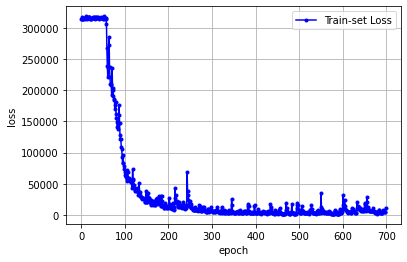

In [57]:
import matplotlib.pyplot as plt

# y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss[1:]))
# plt.plot(x_len, y_vloss[1:], marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss[1:], marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [58]:
group_x_test, group_y_test = make_dataset(x_test, y_test, 17)

In [59]:
y_pred = model.predict(group_x_test)

In [60]:
group_x_test.shape

(187, 17, 43)

In [61]:
y_pred.shape

(187, 1)

In [62]:
y_pred

array([[2001.2623],
       [2257.9048],
       [2222.52  ],
       [2213.1445],
       [2243.9473],
       [2234.3274],
       [2332.3445],
       [2300.7493],
       [2258.0164],
       [2172.033 ],
       [2129.012 ],
       [2238.3516],
       [2331.7646],
       [1984.9547],
       [2251.266 ],
       [2216.564 ],
       [2330.5251],
       [1442.9417],
       [1587.0626],
       [1557.4005],
       [1577.1432],
       [1534.737 ],
       [1592.8606],
       [1677.9927],
       [1611.8862],
       [2103.2527],
       [1417.8727],
       [1518.2722],
       [1568.7784],
       [1695.2479],
       [1902.9238],
       [1614.5914],
       [1603.4674],
       [1585.2958],
       [1399.1886],
       [1471.0411],
       [1522.8303],
       [1576.3492],
       [1444.3749],
       [1516.5767],
       [1469.5143],
       [1561.7942],
       [1522.6976],
       [1456.039 ],
       [1503.6885],
       [1528.9478],
       [1563.2662],
       [1548.1205],
       [1476.8293],
       [1469.7234],


In [63]:
mean_pred = []
for i in range(0, len(y_pred), 17):
  mean = np.mean(y_pred[i:i+17])
  mean_pred.append(mean)
mean_pred

[2218.7463,
 1623.0427,
 1501.4819,
 1454.4318,
 1476.0479,
 1512.1622,
 1497.6987,
 1760.1,
 1544.8778,
 1669.5854,
 1922.2758]

In [64]:
group_y_test

array([1747, 1747, 1747, 1747, 1747, 1747, 1747, 1747, 1747, 1747, 1747,
       1747, 1747, 1747, 1747, 1747, 1747, 1465, 1465, 1465, 1465, 1465,
       1465, 1465, 1465, 1465, 1465, 1465, 1465, 1465, 1465, 1465, 1465,
       1465, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1199, 1199, 1199, 1199, 1199, 1199, 1199, 1669, 1669, 1669, 1669,
       1669, 1669, 1669, 1669, 1669, 1669, 1669, 1669, 1669, 1669, 1669,
       1669, 1669, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
       1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1933, 1933, 1933,
       1933, 1933, 1933, 1933, 1933, 1933, 1933, 1933, 1933, 1933, 1933,
       1933, 1933, 1933, 2190, 2190, 2190, 2190, 2190, 2190, 2190, 2190,
       2190, 2190, 2190, 2190, 2190, 2190, 2190, 2190, 2190, 2141, 2141,
       2141, 2141, 2141, 2141, 2141, 2141, 2141, 2141, 2141, 2141, 2141,
       2141, 2141, 2141, 2141, 2041, 2041, 2041, 2041, 2041, 2041, 2041,
       2041, 2041, 2041, 2041, 2041, 2041, 2041, 20

In [65]:
y_test_unique = [group_y_test[i] for i in range(0, len(group_y_test), 17)]

In [66]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_unique, mean_pred))
rmse

406.1178895047676

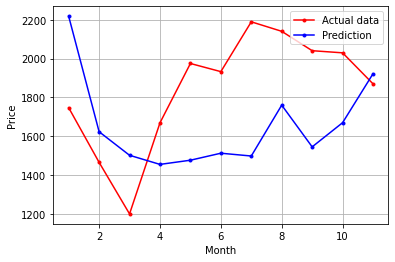

In [67]:
import matplotlib.pyplot as plt


x_len = np.arange(1, len(y_test_unique)+1)
plt.plot(x_len, y_test_unique, marker='.', c='red', label="Actual data")
plt.plot(x_len, mean_pred, marker='.', c='blue', label="Prediction")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()